In [ ]:
%pip install pandas

In [ ]:
# Uncomment this if running in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from fractions import Fraction

file_path = '/content/drive/MyDrive/Horses.csv'

# Use this path for local environment
#file_path = 'Horses.csv'


df = pd.read_csv(file_path)
df.head()

,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,AllowanceValue,OverweightValue,TrainerID,OwnerID,...,Going,Weather,Course_Distance,RaceType,TrackType,Handicap,eligibility,CourseID,MeetingDate,Won
0,989418,2963489,7,5.0,132,1398052.0,NaN,NaN,1198534,1289143.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
1,989418,2972665,13,6.0,132,1165412.0,NaN,NaN,1188128,1140080.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
2,989418,2972662,9,7.0,132,1239852.0,NaN,NaN,1199122,1448576.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
3,989418,2960365,1,12.0,132,1417524.0,NaN,NaN,1049637,1487690.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,1
4,989418,2968596,11,8.0,132,1354773.0,NaN,NaN,1140041,1403676.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0


### Data Exploration

In [ ]:
#Listing out all the columns
df.columns

Index(['RaceID', 'HorseID', 'Cloth', 'Stall', 'WeightValue', 'JockeyID',
       'AllowanceValue', 'OverweightValue', 'TrainerID', 'OwnerID',
       'LastRunDaysFlat', 'Age', 'Blinkers', 'Hood', 'Visor', 'EyeShield',
       'Eyecover', 'TongueStrap', 'CheekPieces', 'ForecastPrice', 'StatCourse',
       'StatDistance', 'StatCourseDistance', 'StartingPrice', 'Bred', 'DamID',
       'SireID', 'DamSireID', 'Sex', 'Colour', 'YearBorn', 'MeetingID',
       'RaceNumber', 'ScheduledTime', 'HorseCount', 'Runners', 'Going',
       'Weather', 'Course_Distance', 'RaceType', 'TrackType', 'Handicap',
       'eligibility', 'CourseID', 'MeetingDate', 'Won'],
      dtype='object')

In [ ]:
#Finding out the date range for this CSV

df['MeetingDate'] = pd.to_datetime(df['MeetingDate'], errors='coerce')
first_meeting_date = df['MeetingDate'].min()
last_meeting_date = df['MeetingDate'].max()
print("First meeting date:", first_meeting_date)
print("Last meeting date:", last_meeting_date)

First meeting date: 2017-01-06 00:00:00
Last meeting date: 2018-12-01 00:00:00


In [ ]:
unique_stat_course_distance = df['StatCourseDistance'].unique()
unique_stat_course = df['StatCourse'].unique()
unique_stat_distance = df['StatDistance'].unique()

print(unique_stat_course_distance)
print(unique_stat_course_distance)
print(unique_stat_course_distance)

[nan  1.  2.  3.  4.  6.  5.  7.]
[nan  1.  2.  3.  4.  6.  5.  7.]
[nan  1.  2.  3.  4.  6.  5.  7.]


Unsure of the meaning of the columns

What are the values at StatCourseDistance,StatCourse,StatDistance ?


In [ ]:
unique_RaceType = df['RaceType'].unique()

print(unique_RaceType)

['Flat' nan]


RaceType is always Flat for those with valid data, maybe could exclude it in the dimensional models ?
Unless Jump races will be incoporated into the data at a future time

### Validate data quality

In [ ]:
#Looking into prices/odds, which i think it's the most important key metrics to measure performance

'''
FP = df['ForecastPrice'].unique()
print(sorted(FP))
print (len(FP))
'''

"\nFP = df['ForecastPrice'].unique()\nprint(sorted(FP))\nprint (len(FP))\n"

In [ ]:
'''
FP = df['StartingPrice'].unique()
print(sorted(FP))
print (len(FP))
'''

"\nFP = df['StartingPrice'].unique()\nprint(sorted(FP))\nprint (len(FP))\n"

Same applies to StartingPrice

After running last cell, we see there are 2 types of data in this coloumn, STR and Float

> typeError: '<' not supported between instances of 'float' and 'str'


 Block Commented so it can be executed all

In [ ]:
#Looking into odds, trying to see what's inside and obtain the **values**
FP_float_values = pd.to_numeric(df['ForecastPrice'], errors='coerce').dropna().sort_values().unique()
FP_string_values = df['ForecastPrice'][df['ForecastPrice'].apply(lambda x: isinstance(x, str))].unique()
print (FP_float_values)
print (FP_string_values)

[-1.]
['16-Jan' '20-Jan' '10-Jan' '07-Apr' '08-Jan' '14-Jan' '03-Jan' '25-Jan'
 '13-Feb' '09-Apr' '12-Jan' '09-Feb' '05-Jan' '33/1' '04-Jan' '02-Jan'
 '07-Jan' '66/1' '05-Feb' '06-Apr' '50/1' '06-Jan' '07-Feb' '11-Feb'
 '08-Nov' '11-Apr' '13-Aug' 'Aug-15' '10-Nov' '05-Apr' '01-Jan' '06-May'
 '-1' '15-Aug' '100/1' '01-Apr' '10-Mar' '04-May' '99/1' '35/1' '01-Feb'
 '11-Aug' '07-Oct' '01-May' '18-Jan' '22-Jan' '40/1' '04-Jun' '09-May'
 '14-May' '07-May' '33/10' '11-Oct' '16-Oct' '04-Jul' '09-Oct' '02-May']


In [ ]:
SP_float_values = pd.to_numeric(df['StartingPrice'], errors='coerce').dropna().sort_values().unique()
SP_string_values = df['StartingPrice'][df['StartingPrice'].apply(lambda x: isinstance(x, str))].unique()
print (SP_float_values)
print (SP_string_values)

[]
['12-Jan' '40/1' '11-Oct' '28-Jan' '33/1' '50/1' '16-Jan' '11-Aug'
 '06-Jan' '100/1' '17-Feb' '66/1' '09-Feb' '05-Jun' '14-Jan' '13-Feb'
 '10-Mar' '18-Jan' '07-Apr' '15-Aug' '22-Jan' '03-Jan' '05-Feb' '09-Jan'
 '07-Jan' '11-Feb' '08-Jan' '11-Jan' '10-Jan' '04-Jan' '09-Apr' '25-Jan'
 '07-Feb' '11-Apr' '15-Feb' '05-Jan' '30-Jan' '02-Jan' '20-Jan' '01-Jan'
 '10-Nov' '80/1' '85/40' '05-Apr' '06-May' '13-Aug' '06-Apr' '08-Nov'
 '01-Feb' '16-Oct' '04-May' '75/1' '13-May' '07-May' '55/1' '45/1'
 '07-Oct' '21/20' '02-Jul' '03-May' '01-Mar' '04-Nov' '04-Jul' '01-Jul'
 '04-Sep' '02-May' 'Aug-13' '04-Jun' '01-Apr' '01-Sep' '15-Jan' '13-Jan'
 '13-Oct' '17-Oct' '01-Jun' '03-Oct' '14-May' '125/1' '09-Oct' 'Aug-15'
 '02-Nov' '150/1' '13/20' '33/10' '03-Apr' '60/1' '70/1' '02-Sep']


Looking at the distinct values in ForecastPrice, it containes date values and Fractional Values
They should all be fraction values but some of them got converted to date value
Note: To verify this to the data provider

In [ ]:
#Once Data Provider has replied, change this into Fractional Odds

df['ForecastPrice'] = df['ForecastPrice'].astype(str)
df['StartingPrice'] = df['StartingPrice'].astype(str)

# Remove '/24' just incase there are data for 2024 included from the 'ForecastPrice' and 'StartingPrice' columns
df['ForecastPrice'] = df['ForecastPrice'].str.replace('/24', '', regex=False)
df['StartingPrice'] = df['StartingPrice'].str.replace('/24', '', regex=False)

# Replace - with /:
df['ForecastPrice'] = df['ForecastPrice'].str.replace('-', '/', regex=False)
df['StartingPrice'] = df['StartingPrice'].str.replace('-', '/', regex=False)

# Replace month with numbers:
month_mapping = {
    'Jan': '1', 'Feb': '2', 'Mar': '3', 'Apr': '4',
    'May': '5', 'Jun': '6', 'Jul': '7', 'Aug': '8',
    'Sep': '9', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

df['ForecastPrice'] = df['ForecastPrice'].replace(month_mapping, regex=True)
df['StartingPrice'] = df['StartingPrice'].replace(month_mapping, regex=True)

#Get rid of the leading 0
df['ForecastPrice'] = df['ForecastPrice'].str.lstrip('0')
df['StartingPrice'] = df['StartingPrice'].str.lstrip('0')

print(df[['ForecastPrice','StartingPrice']])

      ForecastPrice StartingPrice
0              16/1          12/1
1              20/1          40/1
2              10/1           nan
3               7/4         11/10
4               8/1           nan
...             ...           ...
36814          50/1          66/1
36815          33/1          18/1
36816          50/1           nan
36817           7/1          12/1
36818          50/1         100/1

[36819 rows x 2 columns]


In [ ]:
#Convert Fractional into Decimal odds, and change the dtype
def convert_fraction_to_float(value):
    try:
        # Check if it's a valid fraction (should contain both numerator and denominator)
        if '/' in value and value.split('/')[0]:  # Ensures there's a numerator before '/'
            return float(Fraction(value))  # Convert valid fraction to float
        else:
            return None  # Return None for invalid fraction (e.g '/1' (One of the data contain this))
    except (ValueError, TypeError):
        return None  # Error handling

# Make sure the 'ForecastPrice' and 'StartingPrice' column is treated as a str
df['ForecastPrice'] = df['ForecastPrice'].astype(str)
df['StartingPrice'] = df['StartingPrice'].astype(str)


# Apply the function to the 'ForecastPrice' column
df['ForecastPrice'] = df['ForecastPrice'].apply(convert_fraction_to_float)
df['StartingPrice'] = df['StartingPrice'].apply(convert_fraction_to_float)


# Print the result
print(df['ForecastPrice'].head())
print(df['StartingPrice'].head())

0    16.00
1    20.00
2    10.00
3     1.75
4     8.00
Name: ForecastPrice, dtype: float64
0    12.0
1    40.0
2     NaN
3     1.1
4     NaN
Name: StartingPrice, dtype: float64


In [ ]:
df['OverweightValue'].count()

106

It looks like an empty column so double checking, there are 106 values

### Identify Metrics

In [ ]:
#See how many wins there are, this also determines how many individual races there are

win_distribution = df['Won'].value_counts()
print(win_distribution)

Won
0    33912
1     2907
Name: count, dtype: int64


In [ ]:
#Check if Horse ID and Owner ID is one to one
owner_changes = df.groupby('HorseID')['OwnerID'].nunique()

horses_with_owner_changes = owner_changes[owner_changes > 1]

print(horses_with_owner_changes)

HorseID
2708316    2
2729640    2
2730380    2
2742993    2
2749288    2
          ..
3005839    2
3007502    2
3007508    2
3008055    2
3008062    2
Name: OwnerID, Length: 573, dtype: int64


Was going to put Horse ID and Owner ID into the same table (on the ERD), but turns out there are 573 horses with owner changes

In [ ]:
#Win Rate for Horse and Jockey
'''
win_rate_by_horse = df.groupby('HorseID')['Won'].mean() * 100

win_rate_by_jockey = df.groupby('JockeyID')['Won'].mean() * 100

print (win_rate_by_horse.value_counts().sort_index(ascending=False))
print (win_rate_by_jockey.value_counts().sort_index(ascending=False))
'''


# Calculate Win Rate for Horse and Jockey
win_rate_by_horse = df.groupby('HorseID')['Won'].mean() * 100
win_rate_by_jockey = df.groupby('JockeyID')['Won'].mean() * 100

# Create DataFrames that include the IDs along with win rates
win_rate_by_horse_df = win_rate_by_horse.reset_index(name='WinRate')
win_rate_by_jockey_df = win_rate_by_jockey.reset_index(name='WinRate')

# Sort by win rate in descending order and print the result
print("Win Rate by Horse:")
print(win_rate_by_horse_df.sort_values(by='WinRate', ascending=False))

print("Win Rate by Jockey:")
print(win_rate_by_jockey_df.sort_values(by='WinRate', ascending=False))


Win Rate by Horse:
      HorseID  WinRate
5780  3008072    100.0
5557  3004981    100.0
5362  3001088    100.0
4320  2978290    100.0
5468  3003083    100.0
...       ...      ...
2350  2933357      0.0
2348  2933355      0.0
2347  2933353      0.0
2344  2933350      0.0
6063  3013308      0.0

[6064 rows x 2 columns]
Win Rate by Jockey:
      JockeyID  WinRate
235  1496022.0    100.0
240  1499530.0     60.0
173  1468748.0     50.0
186  1472303.0     50.0
214  1495007.0     50.0
..         ...      ...
135  1389064.0      0.0
133  1388527.0      0.0
132  1388338.0      0.0
127  1378492.0      0.0
247  1503269.0      0.0

[248 rows x 2 columns]


In [ ]:
#Starting Price would tell us a lot of the market movement But since there are questions about the data format the below couldn't be executed
average_starting_price = df.groupby('HorseID')['StartingPrice'].mean()

average_starting_price_df = average_starting_price.reset_index()

average_starting_price_df.columns = ['HorseID', 'average_starting_price']
print(average_starting_price_df)

average_starting_price_df_sorted = average_starting_price_df.sort_values(by='average_starting_price')
print(average_starting_price_df_sorted)

      HorseID  average_starting_price
0     2261982                3.614583
1     2620254               22.000000
2     2656091               27.500000
3     2658984               77.857143
4     2668444               39.000000
...       ...                     ...
6059  3013304                     NaN
6060  3013305                     NaN
6061  3013306                     NaN
6062  3013307                     NaN
6063  3013308                     NaN

[6064 rows x 2 columns]
      HorseID  average_starting_price
3323  2958031                0.574359
5362  3001088                0.600000
5769  3008061                0.727273
3970  2972556                0.750000
5798  3008411                0.790909
...       ...                     ...
6059  3013304                     NaN
6060  3013305                     NaN
6061  3013306                     NaN
6062  3013307                     NaN
6063  3013308                     NaN

[6064 rows x 2 columns]


One thing i realised, after the conversion of fractional into decimal odds, it looks different. It turns out it is now in Hong Kong odds



> A variation of fractional odds is known as Hong Kong odds. Fractional and Hong Kong odds are actually exchangeable. The only difference is that the UK odds are presented as a fractional notation (e.g. 6/5) whilst the Hong Kong odds are decimal (e.g. 1.2). Both exhibit the net return.



Reason to change it into decimal/Hong Kong odds:


*   Easier to understand how much profit you will make
*   Don't need to deal with fractions
*   Much easier to understand for those who are not familiar with odds








In [ ]:
#Trainers often provide a good insight to a horse, so finding out which trainer have the most success rate would be useful
trainer_stats = df.groupby('TrainerID').agg(
total_races=('RaceID', 'count'),
total_wins=('Won', 'sum'))

trainer_stats['win_rate'] = (trainer_stats['total_wins'] / trainer_stats['total_races']) * 100
trainer_stats = trainer_stats.sort_values(by='win_rate', ascending=False)

print(trainer_stats[['total_races', 'total_wins', 'win_rate']])

           total_races  total_wins   win_rate
TrainerID                                    
1101907            146          26  17.808219
1049637            617          92  14.910859
1240122            233          34  14.592275
1188319             55           8  14.545455
1392174            395          55  13.924051
...                ...         ...        ...
1188086             60           0   0.000000
1154139             82           0   0.000000
1291819             29           0   0.000000
1079224             33           0   0.000000
1502153             13           0   0.000000

[160 rows x 3 columns]


The same could be done with owners



Date since last run
1. Some better when fresh
2. Some better after a recent run (Warmed up)

LastRunDaysFlat from the name seems to be what I am looking for, but best to double confirm with the data provider


Course Distance and Turf Horses would have preferred condition when running


In [ ]:
#Using the same logic for trainers but with horses this time, along with the track type and distance
horse_performance = df.groupby(['HorseID', 'Course_Distance', 'TrackType']).agg(
total_races=('RaceID', 'count'),
total_wins=('Won', 'sum'))

horse_performance['win_rate'] = (horse_performance['total_wins'] / horse_performance['total_races']) * 100
horse_performance = horse_performance.sort_values(by='win_rate', ascending=False)
#Filters can be used here
turf_performance = horse_performance[horse_performance.index.get_level_values('TrackType') == 'Sand']
course_distance_performance = horse_performance[horse_performance.index.get_level_values('Course_Distance') == 1531]

print(course_distance_performance[['total_races', 'total_wins', 'win_rate']])


                                   total_races  total_wins  win_rate
HorseID Course_Distance TrackType                                   
2855247 1531            Polytrack            1           1     100.0
2962264 1531            Turf                 1           1     100.0
2962260 1531            Polytrack            1           1     100.0
2859835 1531            Turf                 1           1     100.0
2993403 1531            Turf                 1           1     100.0
...                                        ...         ...       ...
2924674 1531            Turf                 1           0       0.0
2924953 1531            Turf                 2           0       0.0
2924671 1531            Turf                 1           0       0.0
2924949 1531            Turf                 1           0       0.0
2924953 1531            Polytrack            1           0       0.0

[3692 rows x 3 columns]


### Data model

What the numbers mean on the accessories
Accessories: 'Blinkers', 'Hood', 'Visor', 'EyeShield',
       'Eyecover', 'TongueStrap', 'CheekPieces'


Nice to have from Data:
Place Rates, Finishing position


As shown in the code above, some are my perfered metrics when it comes to this horse racing data set

*   Win/Place Rate
*   Jockey/Trainer/Owner win rate
*   Course/Turf/Weather conditions
*   Horse age/accessories/Weight/
*   Age/Sex/Bred/Dam/Sire


Analyzing Forecast Price vs. Starting Price can help identify market trends. By determining the correlation between the horse's performance and the percentage drop from the forecast price to the starting price, you can identify horses with significant drops in odds. Such horses are likely to attract increasing market interest, making them potentially good value picks when only the forecast prices are available. Market movements indicate that these horses might have a high probability of performing well, as reflected in the odds drop.

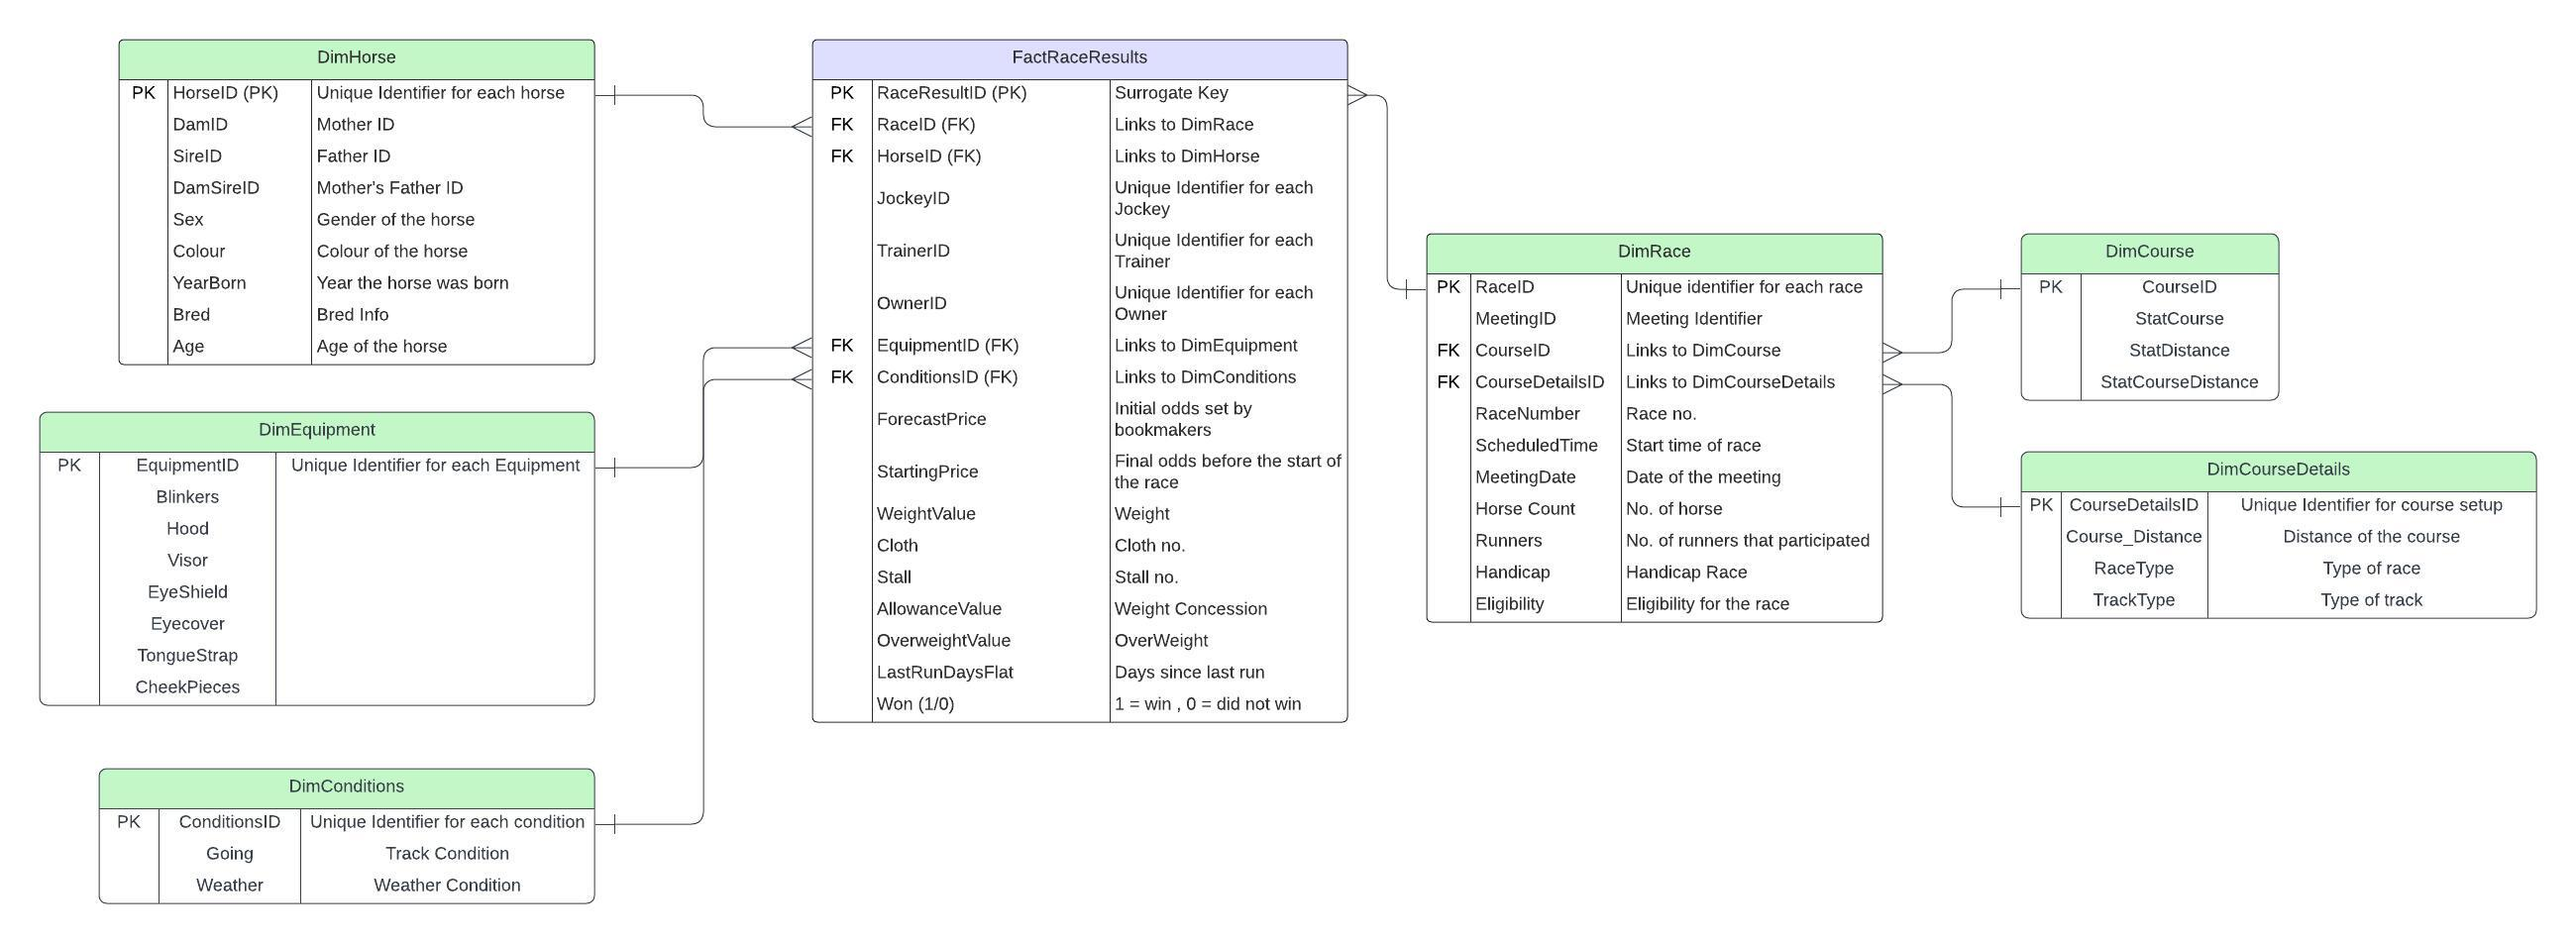

In [ ]:
#When doing the ERD, noticed Won was not a bool, changing it into bool

print(df.dtypes)
'''
df['Won'] = df['Won'].astype(bool)
print(df['Won'].dtypes)
'''

RaceID                         int64
HorseID                        int64
Cloth                          int64
Stall                        float64
WeightValue                    int64
JockeyID                     float64
AllowanceValue               float64
OverweightValue              float64
TrainerID                      int64
OwnerID                      float64
LastRunDaysFlat              float64
Age                          float64
Blinkers                     float64
Hood                         float64
Visor                        float64
EyeShield                    float64
Eyecover                     float64
TongueStrap                  float64
CheekPieces                  float64
ForecastPrice                float64
StatCourse                   float64
StatDistance                 float64
StatCourseDistance           float64
StartingPrice                float64
Bred                          object
DamID                        float64
SireID                       float64
D

"\ndf['Won'] = df['Won'].astype(bool)\nprint(df['Won'].dtypes)\n"

Unsure about the data in DimCourse

If additional information is provided for JockeyID, TrainerID, and OwnerID—such as name, experience, or win rate—then each of these entities should be assigned its own dimension table (DimJockey, DimTrainer, and DimOwner). These dimension tables will store detailed attributes that can be used to analyse their impact on race performance.

### Conclusion
Thank you for taking the time to review my work on this project.

I hope my approach and the insights provided are clear and valuable. You will also find a Database ER diagram (Horses_Racing).pdf containing the ERD for the horse racing data model.

Any Feedbacks would be apperciated